# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | crane
Processing Record 3 of Set 1 | walvis bay
Processing Record 4 of Set 1 | gamay
Processing Record 5 of Set 1 | igarka
Processing Record 6 of Set 1 | oranjemund
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | pochep
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | aasiaat
Processing Record 13 of Set 1 | darende
Processing Record 14 of Set 1 | sur
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | kataragama
City not found. Skipping...
Processing Record 18 of Set 1 | gueoul
City not found. Skipping...
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | hermanus
Processing Reco

Processing Record 37 of Set 4 | padangsidempuan
Processing Record 38 of Set 4 | port lincoln
Processing Record 39 of Set 4 | mahina
Processing Record 40 of Set 4 | baihe
Processing Record 41 of Set 4 | al jawf
Processing Record 42 of Set 4 | tazacorte
Processing Record 43 of Set 4 | ilhabela
Processing Record 44 of Set 4 | udachny
Processing Record 45 of Set 4 | outapi
City not found. Skipping...
Processing Record 46 of Set 4 | punta arenas
Processing Record 47 of Set 4 | gonabad
Processing Record 48 of Set 4 | kuanda
Processing Record 49 of Set 4 | champasak
Processing Record 0 of Set 5 | antalaha
Processing Record 1 of Set 5 | antonio enes
Processing Record 2 of Set 5 | parambu
Processing Record 3 of Set 5 | bizerte
Processing Record 4 of Set 5 | whitehorse
Processing Record 5 of Set 5 | itarantim
Processing Record 6 of Set 5 | avarua
Processing Record 7 of Set 5 | aripuana
Processing Record 8 of Set 5 | pimentel
Processing Record 9 of Set 5 | dudinka
Processing Record 10 of Set 5 | 

Processing Record 28 of Set 8 | arteche
Processing Record 29 of Set 8 | guasdualito
Processing Record 30 of Set 8 | ribas do rio pardo
Processing Record 31 of Set 8 | lethem
Processing Record 32 of Set 8 | rosario
Processing Record 33 of Set 8 | atchison
Processing Record 34 of Set 8 | armidale
Processing Record 35 of Set 8 | ouro preto do oeste
Processing Record 36 of Set 8 | camana
Processing Record 37 of Set 8 | el bauga
Processing Record 38 of Set 8 | hihifo
City not found. Skipping...
Processing Record 39 of Set 8 | diego martin
Processing Record 40 of Set 8 | isiro
Processing Record 41 of Set 8 | manokwari
Processing Record 42 of Set 8 | sa pa
Processing Record 43 of Set 8 | noosa heads
Processing Record 44 of Set 8 | domerat
Processing Record 45 of Set 8 | safotu
Processing Record 46 of Set 8 | tabou
Processing Record 47 of Set 8 | la mira
Processing Record 48 of Set 8 | touros
Processing Record 49 of Set 8 | terra santa
Processing Record 0 of Set 9 | nanlong
Processing Record 1

Processing Record 15 of Set 12 | inari
Processing Record 16 of Set 12 | nampula
Processing Record 17 of Set 12 | nizhniy dzhengutay
Processing Record 18 of Set 12 | lumberton
Processing Record 19 of Set 12 | az zubayr
Processing Record 20 of Set 12 | necochea
Processing Record 21 of Set 12 | cutral-co
Processing Record 22 of Set 12 | makhambet
Processing Record 23 of Set 12 | arawa
Processing Record 24 of Set 12 | ghat
Processing Record 25 of Set 12 | paicandu
Processing Record 26 of Set 12 | taikang
Processing Record 27 of Set 12 | harrismith
Processing Record 28 of Set 12 | kambove
Processing Record 29 of Set 12 | christchurch
Processing Record 30 of Set 12 | paracuru
Processing Record 31 of Set 12 | sanming
Processing Record 32 of Set 12 | gastonia
Processing Record 33 of Set 12 | gao
Processing Record 34 of Set 12 | sandnessjoen
Processing Record 35 of Set 12 | port-cartier
Processing Record 36 of Set 12 | tan-tan
Processing Record 37 of Set 12 | ponta delgada
Processing Record 38 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,19.84,52,87,4.96,AU,1701022380
1,crane,31.3974,-102.3501,8.44,35,100,5.60,US,1701022381
2,walvis bay,-22.9575,14.5053,16.16,70,26,6.76,NA,1701022377
3,gamay,12.3854,125.2979,25.23,93,33,2.12,PH,1701022383
4,igarka,67.4667,86.5833,-27.50,99,80,2.58,RU,1701022384


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,19.84,52,87,4.96,AU,1701022380
1,crane,31.3974,-102.3501,8.44,35,100,5.60,US,1701022381
2,walvis bay,-22.9575,14.5053,16.16,70,26,6.76,NaN,1701022377
3,gamay,12.3854,125.2979,25.23,93,33,2.12,PH,1701022383
4,igarka,67.4667,86.5833,-27.50,99,80,2.58,RU,1701022384


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

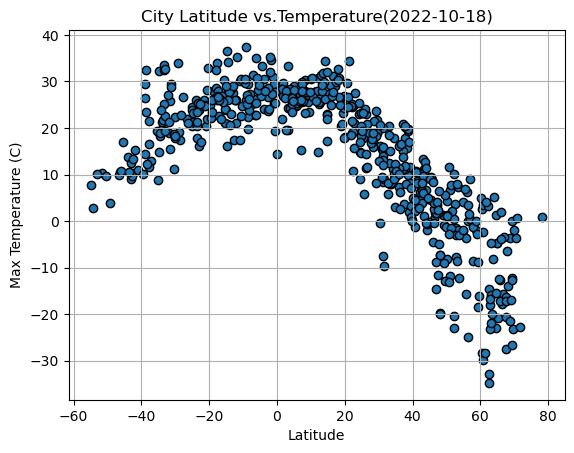

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs.Temperature(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

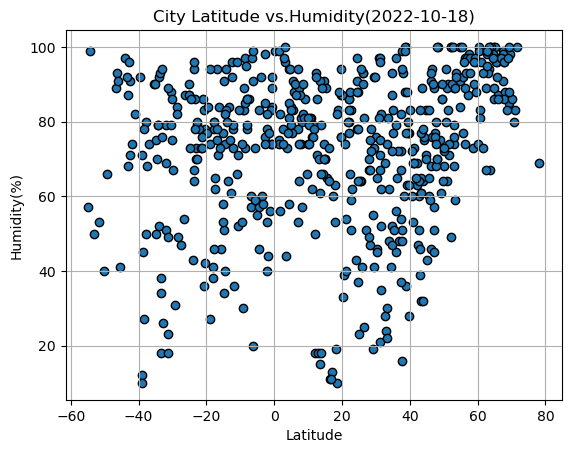

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs.Humidity(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

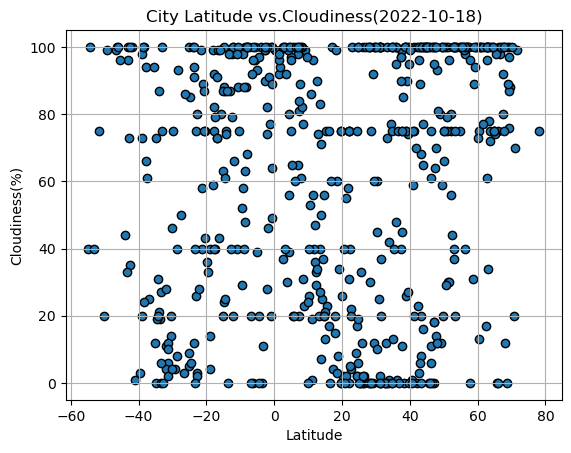

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs.Cloudiness(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

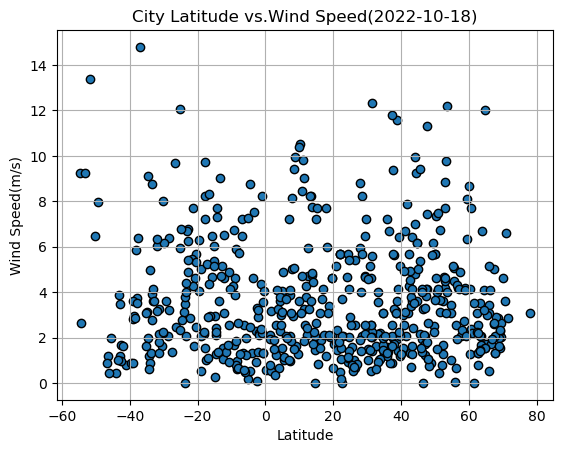

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs.Wind Speed(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis, xy):  
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,regress_values, color='red')
    plt.annotate(line_eq, xy, fontsize=12, color='red')
    print(f"The r-value is {rvalue}")

In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
ID,,,,,,,,,
1,crane,31.3974,-102.3501,8.44,35,100,5.60,US,1701022381
3,gamay,12.3854,125.2979,25.23,93,33,2.12,PH,1701022383
4,igarka,67.4667,86.5833,-27.50,99,80,2.58,RU,1701022384
7,bethel,41.3712,-73.4140,8.60,69,100,2.06,US,1701022386
8,pochep,52.9336,33.4464,-1.51,89,100,8.83,RU,1701022387


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,19.84,52,87,4.96,AU,1701022380
2,walvis bay,-22.9575,14.5053,16.16,70,26,6.76,NaN,1701022377
5,oranjemund,-28.5500,16.4333,17.50,84,8,6.37,NaN,1701022385
6,west island,-12.1568,96.8225,25.99,78,100,3.09,CC,1701022385
10,waitangi,-43.9535,-176.5597,13.79,97,44,0.45,NZ,1701022388


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8734502348910503


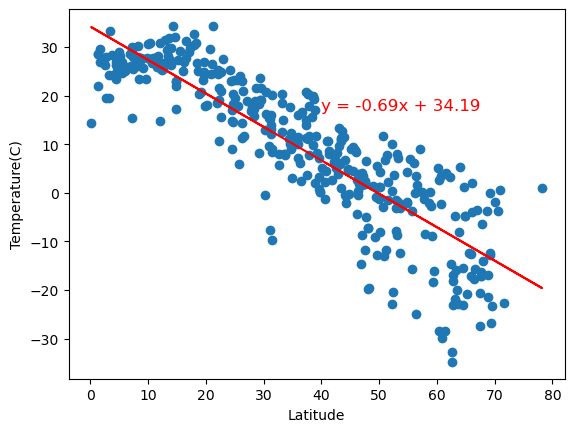

In [62]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], (40, 17))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

plt.show()

The r-value is 0.6719439678713078


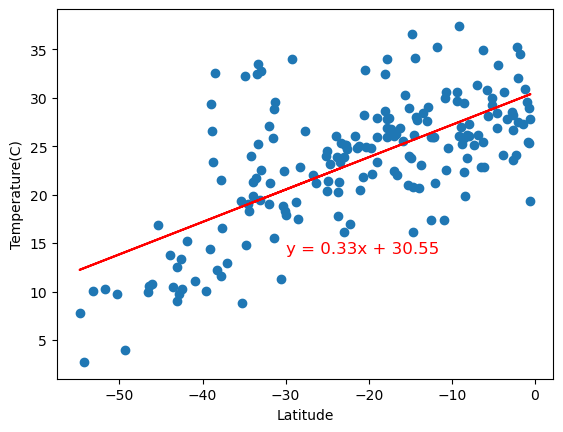

In [64]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-30, 14))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

plt.show()

**Discussion about the linear relationship:** There is a negative relationship between temperature and latitude in the Northern Hemisphere (r-value is -0.87), while in the Southern Hemisphere this is a positive relationship (r-value is 0.67). This shows that as the latitude increases,  the temperature in the Southern Hemisphere goes up. On the other hand, the temperature in the Northern Hemisphere goes down as latitude increases. This relationship would be as expected given that the latitude at 0 is the equator which would the point on the earth closest to the sun, and the further away you get from there the further away from the sun you would be and the colder it would get.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.27450692747044664


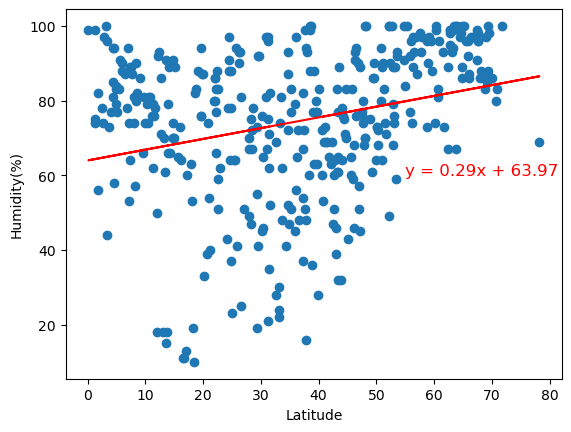

In [65]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(55, 60))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

plt.show()

The r-value is 0.0898884130617598


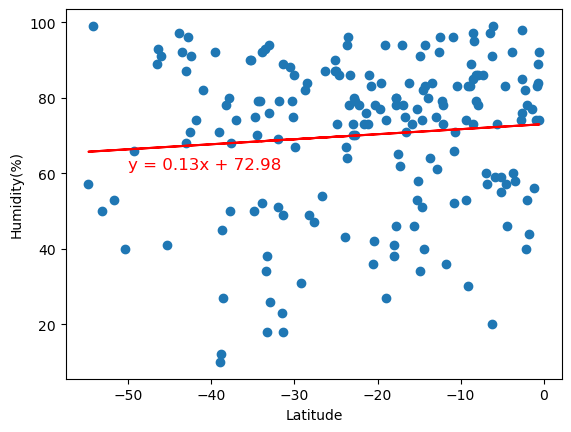

In [66]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 61))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

plt.show()

**Discussion about the linear relationship:** There is a slight positive relationship with the humidity and latitude in the Northern Hemisphere (r-value is 0.27), with a slighter smaller positive relationship in the Southern Hemisphere (r-value is 0.09). The plot shows that the datapoints are scattered around the regression line. This may show that there are other factors involved which influence the humidity in areas.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.2144947959774683


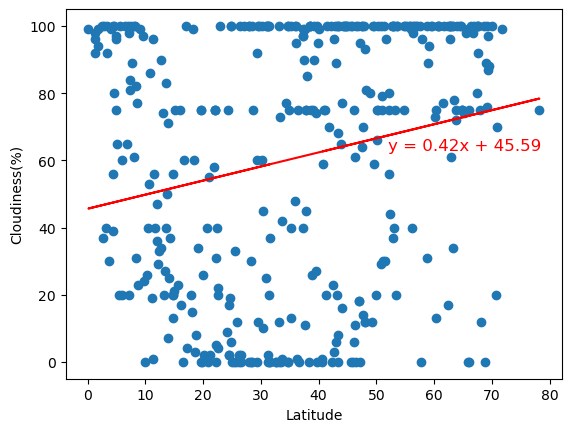

In [69]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(52, 63))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

plt.show()

The r-value is 0.17310414586498107


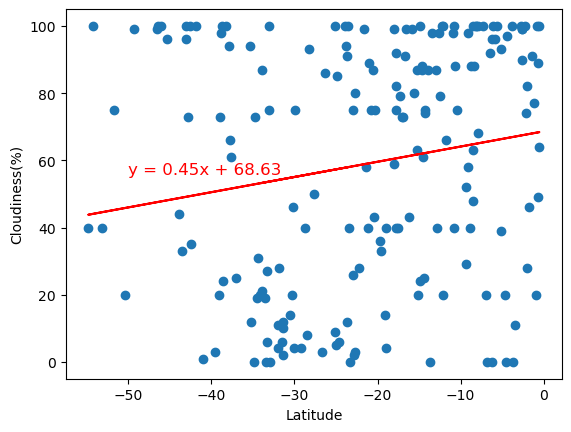

In [70]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50, 56))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

plt.show()

**Discussion about the linear relationship:** There is a positive relationship with the cloudiness and latitude in the Northern Hemisphere (r-value is 0.21), with a relatively similar positive relationship in the Southern Hemisphere (r-value is 0.17). The plot is very similar to the humidity plot, with the datapoints also scattered. This would make sense as humidity affects cloud formation, but there are other factors also involved.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.011078011129709246


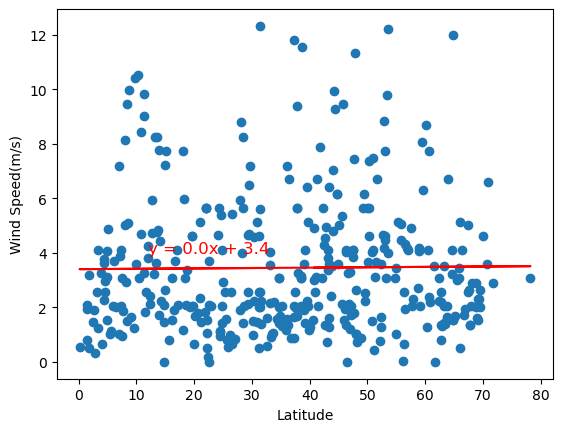

In [71]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(12, 4))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

plt.show()

The r-value is -0.11907867448137245


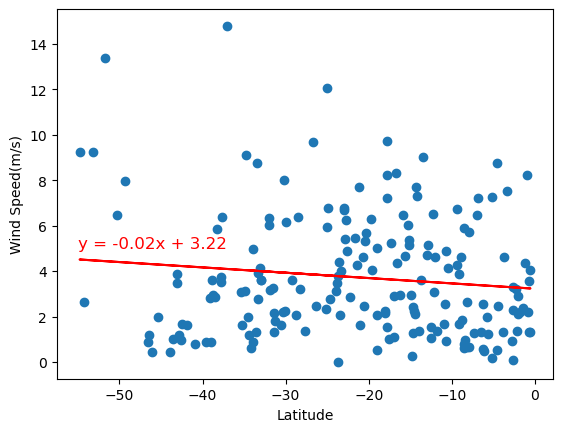

In [72]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-55, 5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

plt.show()

**Discussion about the linear relationship:** There is basically no correlation/relationship with the wind speed and latitude in the Northern Hemisphere (r-value is 0.01), with a very slight negative relationship in the Southern Hemisphere though the value is also relatively small for this (r-value is -0.11). The datapoints are mostly bunched near the bottom half of the graph which would be relatively gentle breezes for each area, but the relationship suggests that latitude is not a factor in wind speed and other areas would need to be looked into. 